In [1]:
import os
import numpy as np
from sklearn.decomposition import PCA
import pandas as pd
from matplotlib import pyplot as plt
from scipy import stats
import warnings 
warnings.filterwarnings("ignore")

# Part 1

In [2]:
def read_text(file_path="p4dataset2018.txt"):
    with open(file_path, 'r') as file:
        result = np.array([line.split() for line in file.readlines()])
        return result

def transform_data(origin_data):
    m = stats.mode(origin_data[:,3:])[0][0]
    result = m != origin_data[:,3:]
    return result.astype('int32')

In [3]:
X_origin = read_text()
X = transform_data(X_origin)
print(X.shape)
print(X[0])

# counting label color
population_dict = {}
sex_dict = {}
color_dict = ['b','c','g','k','m','r','y','orange']
color_index_population = 0
color_index_sex = 0
for individual in X_origin:
    if individual[2] not in population_dict.keys():
        population_dict[individual[2]] = color_dict[color_index_population]
        color_index_population += 1
    if individual[1] not in sex_dict.keys():
        sex_dict[individual[1]] = color_dict[color_index_sex]
        color_index_sex += 1
print(population_dict)
print(sex_dict)

MemoryError: 

### a)

In [ ]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [ ]:
X_pca.shape

### b)

In [ ]:
X_2 = X_pca[:,:2]
plt.xlabel('v1')
plt.ylabel('v2')
for population in population_dict.keys():
    indexes = np.where(X_origin[:,2]==population)
    scatter_plot = plt.scatter(X_2[indexes,0], X_2[indexes,1], c=population_dict[population], marker='.')
plt.legend((population_dict.keys()), loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show();

### c)

It's essentially a map of Africa! People are of cluster distribution.

The first two components reveal the geometry information from nucleobases.  The first principal component $v_1$ corresponds roughly to the latitude of where someone's from, and $v_2$ to the longitude.

### d) 

In [ ]:
X_3 = X_pca[:,[0,2]]
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.title("Population")
plt.xlabel('v1')
plt.ylabel('v3')
for population in population_dict.keys():
    indexes = np.where(X_origin[:,2]==population)
    scatter_plot = plt.scatter(X_3[indexes,0], X_3[indexes,1], c=population_dict[population], marker='.')
plt.legend((population_dict.keys()), loc=2, bbox_to_anchor=(-0.3,1),borderaxespad = 0.)

plt.subplot(1, 2, 2)
plt.title("sex")
plt.xlabel('v1')
plt.ylabel('v3')
for sex in sex_dict.keys():
    indexes = np.where(X_origin[:,1]==sex)
    scatter_plot = plt.scatter(X_3[indexes,0], X_3[indexes,1], c=sex_dict[sex], marker='.')
plt.legend((sex_dict.keys()), loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show();

### e) 

The third principal component captures the sexuality of the samples.

### f)

In [ ]:
plt.figure(figsize=(15,5))
plt.title("nucleobase index vs |3rd|")
plt.xlabel('index')
plt.ylabel('|3rd|')
plt.plot(range(len(X_3)), np.abs(X_3[:,1]))
plt.show();

The line oscillates severely and disorderly. Nevertheless, it oscillates roughly around horizontal line where $V_{component} = 3$ except two abnormal points. Oscillating around a horizontal line illustrates that although people are from different population and have different sexuality, their chromosomes still show consistency to some extend. The two peculiar points reveal another inspect about chromosomes. That is gene mutation. With a small probability, gene can mutate and alter the feature of the people. These two people may have two Y chromosomes rarely and therefore have particular scalar in the third component of PCA. This phenomena uncover the variousness of chromosomes.

## Bonus

### g)

In [ ]:
GTAC_dict = {'G':1, 'T':2, 'A':3, 'C':4}
def transform_data_Y(origin_data):
    x, y = origin_data.shape
    y -= 3
    result = np.zeros((x, y))
    for i in range(x):
        for j in range(y):
            result[i][j] = GTAC_dict[origin_data[i][j+3]]
    return result.astype('int32')    

In [ ]:
Y = transform_data_Y(X_origin)
Y

In [ ]:
pca_y = PCA()
Y_pca = pca_y.fit_transform(Y)
Y_pca.shape

Using bijection to create GTAC_dict, we can preserve more nucleobase information and therefore construct more meaningful eigenvectors to represent out data.

### h)

In [ ]:
Y_2 = Y_pca[:, :2]
plt.xlabel('v1')
plt.ylabel('v2')
for population in population_dict.keys():
    indexes = np.where(X_origin[:,2]==population)
    scatter_plot = plt.scatter(Y_2[indexes,0], Y_2[indexes,1], c=population_dict[population], marker='.')
plt.legend((population_dict.keys()), loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show();

Comparing with picture in part **（b）**, we can hardly find the difference between them.

### i)

In [ ]:
for i in range(3):
    X_4 = X_pca[:,[i,3]]
    plt.figure(figsize=(15,10))
    plt.subplot(2, 2, 1)
    plt.title("Population")
    plt.xlabel('v'+str(i+1))
    plt.ylabel('v4')
    for population in population_dict.keys():
        indexes = np.where(X_origin[:,2]==population)
        scatter_plot = plt.scatter(X_4[indexes,0], X_4[indexes,1], c=population_dict[population], marker='.')
    plt.legend((population_dict.keys()), loc=2, bbox_to_anchor=(-0.3,1),borderaxespad = 0.)

    plt.subplot(2, 2, 2)
    plt.title("sex")
    plt.xlabel('v'+str(i+1))
    plt.ylabel('v4')
    for sex in sex_dict.keys():
        indexes = np.where(X_origin[:,1]==sex)
        scatter_plot = plt.scatter(X_4[indexes,0], X_4[indexes,1], c=sex_dict[sex], marker='.')
    plt.legend((sex_dict.keys()), loc=2, bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.show();

We can see that combine $v_4$ with one of the vector from $v_1$, $v_2$ and $v_3$, we can separate LWK people from the whole crowd. In other words, $v_4$ dominates the distribution of LWK population.

# Part 2

### a)
Least-squares for 1 dimensional vectors:

$\frac{<X-\bar{X}, Y-\bar{Y}>}{||X-\bar{X}||^2_2}$

In [4]:
X = np.array(range(1, 1001))/1000
Y = 2*X

In [5]:
LSQ_recover = lambda X, Y: (X-np.mean(X))@(Y-np.mean(Y)) / (np.linalg.norm(X-np.mean(X))**2)

def PCA_recover(X, Y):
    components = PCA(n_components=1).fit(np.concatenate([X.reshape(-1,1), Y.reshape(-1,1)], axis=1)).components_[0]
    return components[1]/components[0]

In [6]:
print(LSQ_recover(X, Y))
print(PCA_recover(X, Y))

2.0
2.0


### b)

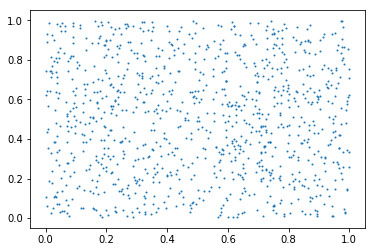

In [11]:
X = np.random.rand(1000)
Y = np.random.rand(1000)
plt.scatter(X,Y, s = 1)
plt.show();

In [12]:
print(LSQ_recover(X, Y))
print(PCA_recover(X, Y))

-0.013498257180651445
-0.21530605299749328


We can see that both PCA and LS recover nothing about the random points.

### c) 

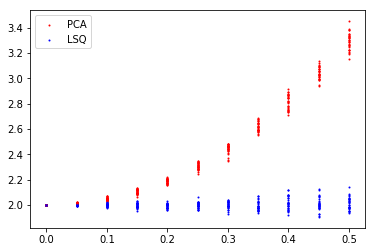

In [9]:
c_list = np.arange(0,0.505,0.05)
times = 30
for _ in range(times):
    LSQ_temp = np.zeros(11)
    PCA_temp = np.zeros(11)
    for ci in range(len(c_list)):
        c = c_list[ci]
        X = np.arange(0.001, 1.001, 0.001)
        Y = X*2 + np.random.normal(0, c, size=(1000,))
        LSQ_temp[ci] = LSQ_recover(X, Y)
        PCA_temp[ci] = np.abs(PCA_recover(X, Y))
    plt.scatter(c_list, PCA_temp, c='r', s = 1)
    plt.scatter(c_list, LSQ_temp, c='b', s = 1)
plt.legend(('PCA','LSQ'))
plt.show();

### d)

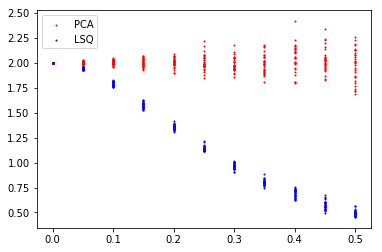

In [10]:
c_list = np.arange(0,0.505,0.05)
times = 30
for _ in range(times):
    LSQ_temp = np.zeros(11)
    PCA_temp = np.zeros(11)
    for ci in range(len(c_list)):
        c = c_list[ci]
        X = np.arange(0.001, 1.001, 0.001) + np.random.normal(0, c, size=(1000,))
        Y = np.arange(0.002, 2.002, 0.002) + np.random.normal(0, c, size=(1000,))
        LSQ_temp[ci] = LSQ_recover(X, Y)
        PCA_temp[ci] = np.abs(PCA_recover(X, Y))
    plt.scatter(c_list, PCA_temp, c='r', s = 1)
    plt.scatter(c_list, LSQ_temp, c='b', s = 1)
plt.legend(('PCA','LSQ'))
plt.show();

### e)

When noise occurs only in $Y$, the first and second components of PCA forms a subspace of three dimension space with scalar of x, scalar of y, and the noise level. The first two componnent may both convey information of  these three kinds of meaning, but with different weight. Whlie the noise level becomes higher, the first component of PCA shows more preference to the noise, the structure  where $\frac{y_{scalar}}{x_{x_{scalar}}}$ is destroyed and therefore the value of the slope of the first component is longer 2.

When the nose occurs in both $X$ and $Y$ direction with the same level, these noise reveal little information about the data structure, so the first and second componnet of PCA preserve the information of scalar in y axis and scalar in x axis individually. Therefore, the value of the slop of the first component is nearly 2.

From problem (b), we can see that, when data is generated totally randomly, LS gets value near to zero. From the perspective of c, when $c \to \infty$， we can treat that X and Y are generated totally randomly. This is the limits form of c. So, when c is increasing, the value of LS will decrease monotonically. This phenomena illustrate the poor performance of LS.